# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix
from sklearn import preprocessing
from scipy.spatial import distance
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib
import time
from mpl_toolkits import mplot3d
import statistics
import missingno as msno

## Import dataset yang telah disediakan

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/reziarsyi/Arzi/main/kendaraan_train.csv")
dataset_test = pd.read_csv("https://raw.githubusercontent.com/reziarsyi/Arzi/main/kendaraan_test.csv")

In [3]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


=====================================================================================

In [11]:
dataset.shape

(285831, 12)

In [12]:
dataset.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

### **`DATA PRE-PROCESSING`**

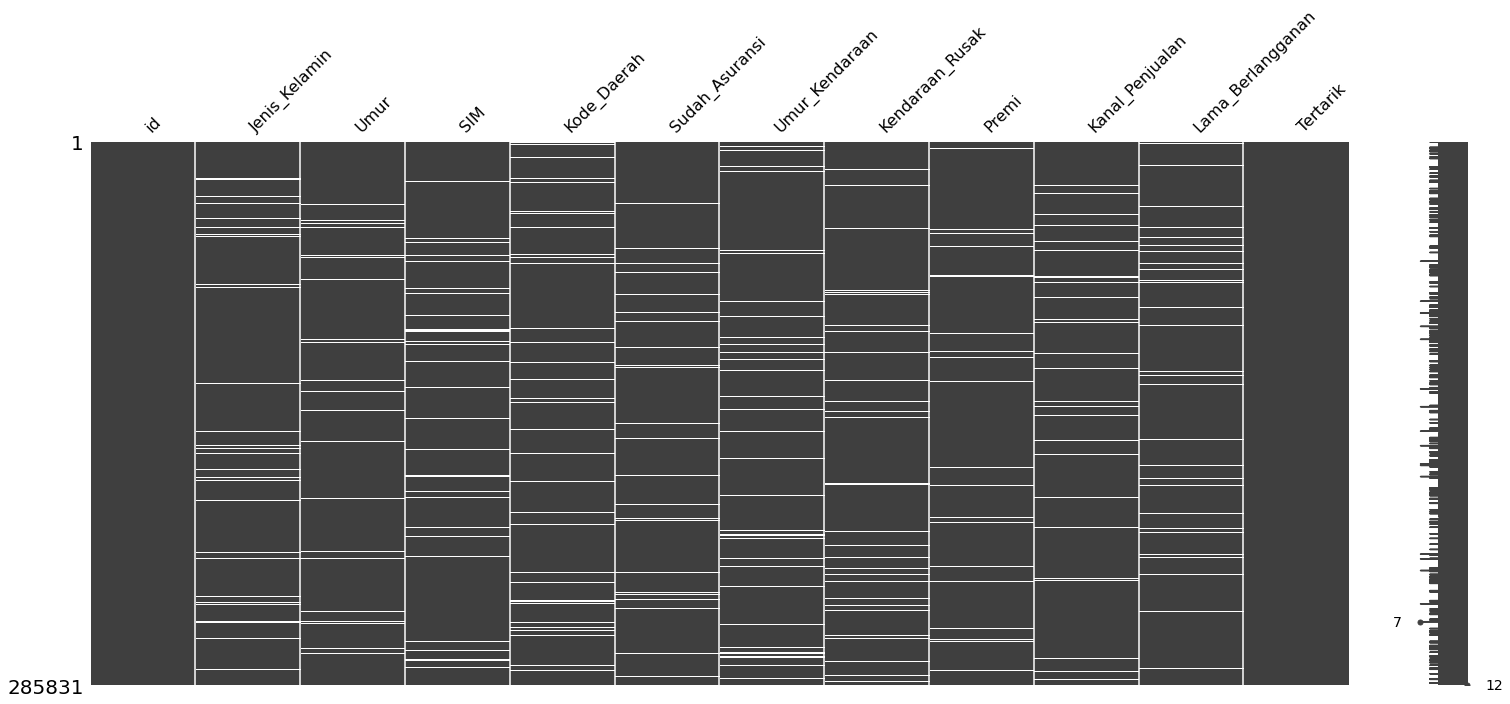

In [4]:
#Untuk Melihat Data NaN (kosong) disetiap kolom
msno.matrix(dataset)

In [13]:
dataset.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

# Mengganti isi data Missing Value(NaN) pada setiap Kolom

In [14]:
dataset["Jenis_Kelamin"] = dataset["Jenis_Kelamin"].replace(np.NaN, np.random.choice(a=["Pria","Wanita"],p=[0.54,0.46])) #Dengan Probabilitas
dataset["Umur"] = dataset["Umur"].replace(np.NaN, dataset["Umur"].mean()) #Dengan Rata-Rata
dataset["SIM"] = dataset["SIM"].replace(np.NaN, dataset["SIM"].mean())
dataset["Kode_Daerah"] = dataset["Kode_Daerah"].replace(np.NaN, statistics.mode(dataset["Kode_Daerah"])) 
dataset ["Sudah_Asuransi"] = dataset["Sudah_Asuransi"].replace(np.NaN, np.random.choice(a=[0, 1],p=[0.5417, 0.4583]))
dataset ["Umur_Kendaraan"] = dataset["Umur_Kendaraan"].replace(np.NaN, np.random.choice(a=["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"],p=[0.431, 0.527, 0.042])) 
dataset ["Kendaraan_Rusak"] = dataset["Kendaraan_Rusak"].replace(np.NaN, np.random.choice(a=["Pernah", "Tidak"],p=[0.5355, 0.4645]))
dataset ["Premi"] = dataset["Premi"].replace(np.NaN, dataset["Premi"].mean()) 
dataset["Kanal_Penjualan"] = dataset["Kanal_Penjualan"].replace(np.NaN, 152) 
dataset ["Lama_Berlangganan"] = dataset[ "Lama_Berlangganan"].replace(np.NaN, dataset["Lama_Berlangganan"].mean())

print(dataset.isnull().sum()) 
dataset.shape

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


(285831, 12)

In [15]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


#Konversi Tipe Data

In [16]:

convert_data_types={
    #'id' : int,
    'Jenis_Kelamin' : object,
    'Umur' : int,
    'SIM' : int,
    'Kode_Daerah' : int,
    'Sudah_Asuransi' : int,
    'Umur_Kendaraan' : object,
    'Kendaraan_Rusak' : object,
    'Premi' : int,
    'Kanal_Penjualan' : int,
    'Lama_Berlangganan' : int
}
dataset = dataset.astype(convert_data_types)
dataset_test = dataset_test.astype(convert_data_types)
dataset.dtypes

id                    int64
Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

# Melakukan Scalling Data pada beberapa kolom

In [17]:
scale_Kendaraan_Rusak = {"Tidak":0,"Pernah":1}
dataset["Kendaraan_Rusak"] = dataset["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)
dataset_test["Kendaraan_Rusak"] = dataset_test["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)

scale_Jenis_Kelamin = {"Wanita":0,"Pria":1}
dataset["Jenis_Kelamin"] = dataset["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)
dataset_test["Jenis_Kelamin"] = dataset_test["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)

#DROP BEBERAPA KOLOM PADA DATA

umurKD = pd.get_dummies(dataset["Umur_Kendaraan"], drop_first=True)
dataset = pd.concat([dataset,umurKD], axis=1)
dataset.drop(["Umur_Kendaraan","id","Kode_Daerah","Kanal_Penjualan"], axis=1,inplace=True)

umurKD = pd.get_dummies(dataset_test["Umur_Kendaraan"], drop_first=True)
dataset_test = pd.concat([dataset_test,umurKD], axis=1)
dataset_test.drop(["Umur_Kendaraan","Kode_Daerah","Kanal_Penjualan"], axis=1,inplace=True)

In [18]:
dataset.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik,< 1 Tahun,> 2 Tahun
0,0,30,1,1,0,28029,97,0,1,0
1,1,48,1,0,1,25800,158,0,0,1
2,0,21,1,1,0,32733,119,0,1,0
3,0,58,1,0,0,2630,63,0,0,0
4,1,50,1,0,0,34857,194,0,0,1


# =========== **PERMODELAN menggunakan KNN** =================

#Melakukan Feature Selection

In [19]:
x1=dataset.iloc[:, [0,1,2,3,4,5,6,8,9]].values
y1=dataset.iloc[:,7].values

x2=dataset_test.iloc[:,[0,1,2,3,4,5,6,8,9]].values
y2=dataset_test.iloc[:,7].values

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
x1 = min_max_scaler.fit_transform(x1)
x2 = min_max_scaler.fit_transform(x2)

## **Melakukan Splitting Data**

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3) #Melakukan Spilting data

## MODELLING

In [22]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [23]:
Accuracy=list()       
timeRequired=list()
#fungsi untuk  x (independen) variabel, y (dependent) varibale dan N (jumlah tetangga)
def simpleKNN(X,y,N): 
    start = time.process_time()
    global X_train,X_test,y_train,y_test, y_predicted 
    X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33,random_state=2) #untuk spliting data pada dataset train dan dataset test
    columns=len(X_train.columns) #Untuk MEnyimpan jumlah dimensi X
    y_predicted=list()
    for index1,TestRow in X_test.iterrows(): #iterasi pada tes yang ditetapkan untuk melakukan prediksi pada setiap baris 
        TestRowTempValue=list()
        for i in range(0,columns): 
            TestRowTempValue.append(TestRow.iloc[i]) #menyimpan data baris untuk menghitung jarak
        temp=list()
        for index2,trainRow in X_train.iterrows(): #iterasi atas pelatihan data untuk menghitung jarak dari setiap titik data
            TrainRowTempValue=list()
            for i in range(0,columns):
                TrainRowTempValue.append(trainRow.iloc[i])
            distanceFromPoint=distance.euclidean(TestRowTempValue,TrainRowTempValue) #store all distace and data points
            temp.append((index1,index2,distanceFromPoint,y_train.loc[index2][0]))
            sortedDis=sorted(temp, key=itemgetter(2)) #sort based on distance calculated
            Ytop=sortedDis[:N]  #it will store nearest points
            neighbours=list()
            for i in Ytop:
                neighbours.append(i[len(i)-1])
        y_predicted.append(most_common(neighbours))
    #print("Confusion Matrix \n",confusion_matrix(y_test,y_predicted),"\n","Accuracy Score",accuracy_score(y_test,y_predicted),"\n","Precison",average_precision_score(y_test,y_predicted))
    Accuracy.append(accuracy_score(y_test,y_predicted))
    timeRequired.append((time.process_time() - start))

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)

## = Nilai N Terbaik =

In [25]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [36]:
PredictedSKL=neigh.predict(x1)

In [39]:
print("Confusion Matrix Kendaraan_Train \n",confusion_matrix(y1,PredictedSKL),"\n","Accuracy Score",accuracy_score(y1,PredictedSKL),"\n","Precison",average_precision_score(y1,PredictedSKL))

Confusion Matrix Kendaraan_Train 
 [[247882   2943]
 [ 32049   2957]] 
 Accuracy Score 0.877578009383167 
 Precison 0.15446153351187705


In [29]:
PredictedSKL2=neigh.predict(x2)

In [30]:
print("Confusion Matrix Kendaraan_Test \n",confusion_matrix(y2,PredictedSKL2),"\n","Accuracy Score",accuracy_score(y2,PredictedSKL2),"\n","Precison",average_precision_score(y2,PredictedSKL2))

Confusion Matrix Kendaraan_Test 
 [[41122   656]
 [ 5532   329]] 
 Accuracy Score 0.8701064254077542 
 Precison 0.1348725919047265


In [40]:
print(dataset)

        Jenis_Kelamin  Umur  SIM  ...  Tertarik  < 1 Tahun  > 2 Tahun
0                   0    30    1  ...         0          1          0
1                   1    48    1  ...         0          0          1
2                   0    21    1  ...         0          1          0
3                   0    58    1  ...         0          0          0
4                   1    50    1  ...         0          0          1
...               ...   ...  ...  ...       ...        ...        ...
285826              0    23    1  ...         0          1          0
285827              0    21    1  ...         0          1          0
285828              0    23    1  ...         0          1          0
285829              1    68    1  ...         0          0          0
285830              1    45    1  ...         0          0          0

[285831 rows x 10 columns]


In [41]:
dataset.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik,< 1 Tahun,> 2 Tahun
0,0,30,1,1,0,28029,97,0,1,0
1,1,48,1,0,1,25800,158,0,0,1
2,0,21,1,1,0,32733,119,0,1,0
3,0,58,1,0,0,2630,63,0,0,0
4,1,50,1,0,0,34857,194,0,0,1
